## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [11]:
# import all librarys and modules needed
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')

df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [12]:
# import and clean data
df = df.drop_duplicates()
df = df.dropna()

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

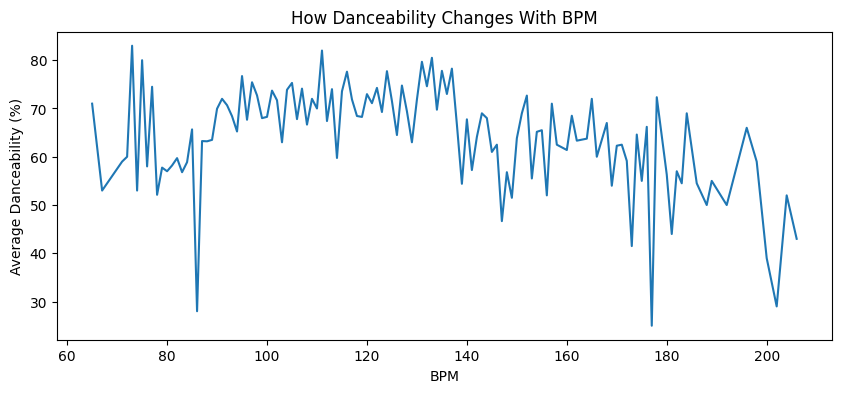

In [13]:
# Line chart: how danceability changes as BPM increases
bpm_group = df.groupby('bpm')['danceability_%'].mean().sort_index()

plt.figure(figsize=(10,4))
plt.plot(bpm_group.index, bpm_group.values)
plt.xlabel("BPM")
plt.ylabel("Average Danceability (%)")
plt.title("How Danceability Changes With BPM")
plt.show()

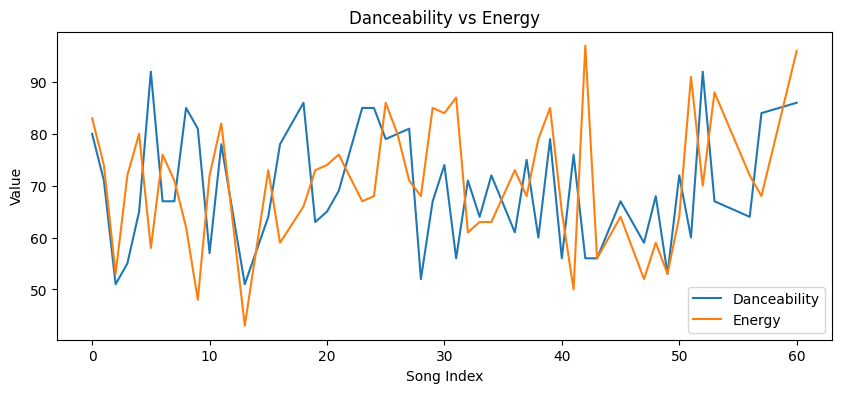

In [14]:
# Multiple Line chart - comparing danceability and energy.
plt.figure(figsize=(10,4))
plt.plot(df['danceability_%'].head(50), label='Danceability')
plt.plot(df['energy_%'].head(50), label='Energy')
plt.xlabel("Song Index")
plt.ylabel("Value")
plt.title("Danceability vs Energy")
plt.legend()
plt.show()


#### Bar Chart

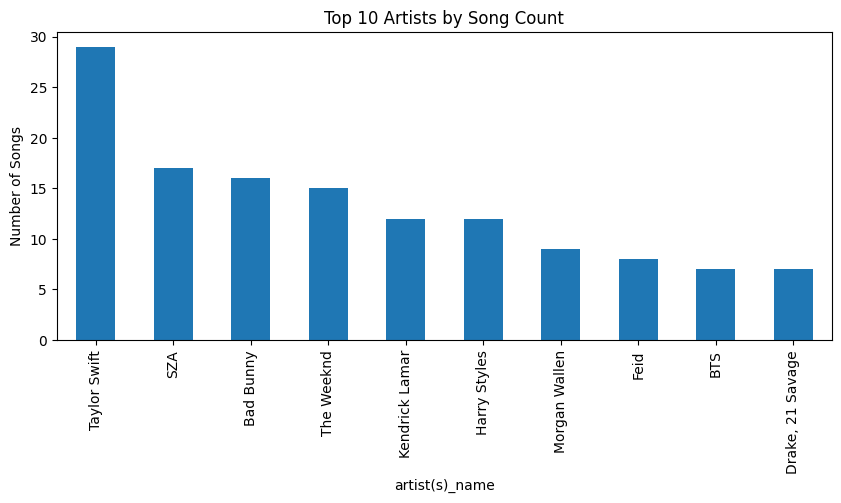

In [15]:
# Vertical bar chart - top 10 artists by number of songs.
artist_counts = df['artist(s)_name'].value_counts().head(10)

plt.figure(figsize=(10,4))
artist_counts.plot(kind='bar')
plt.ylabel("Number of Songs")
plt.title("Top 10 Artists by Song Count")
plt.show()



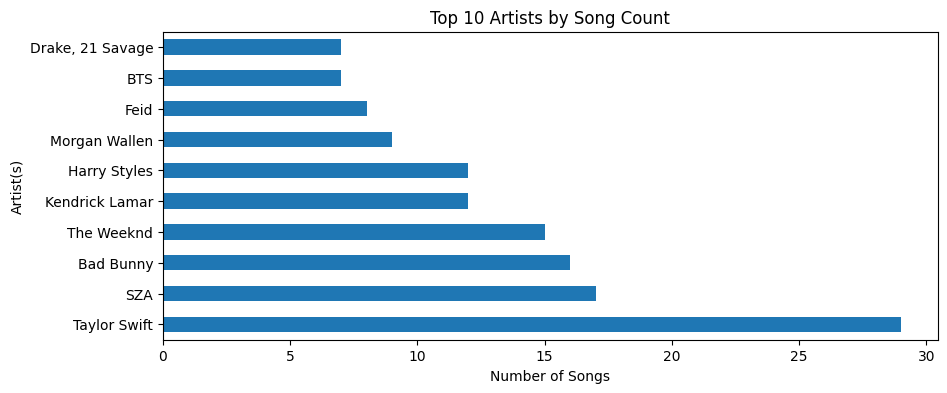

In [16]:
# Horizontal bar chart
plt.figure(figsize=(10,4))
artist_counts.plot(kind='barh')
plt.xlabel("Number of Songs")
plt.ylabel("Artist(s)")
plt.title("Top 10 Artists by Song Count")
plt.show()

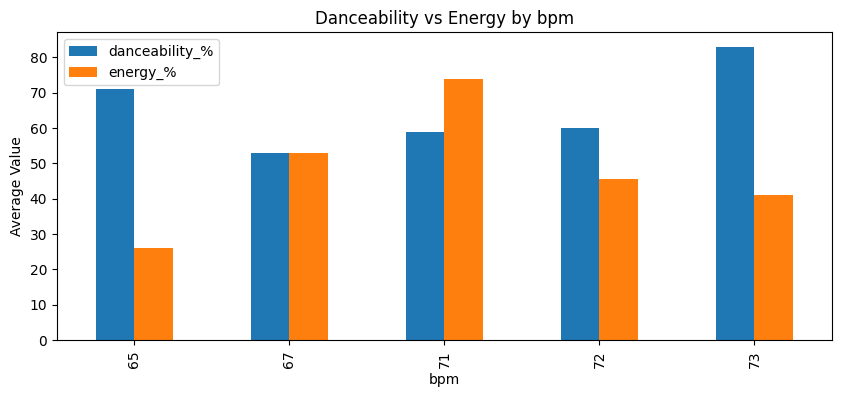

In [17]:
# Grouped bar chart - mean danceability and energy by bpm (top 5).
genre_stats = df.groupby('bpm')[['danceability_%','energy_%']].mean().head(5)
genre_stats.plot(kind='bar', figsize=(10,4))
plt.ylabel("Average Value")
plt.title("Danceability vs Energy by bpm")
plt.show()

#### Scatter Plot

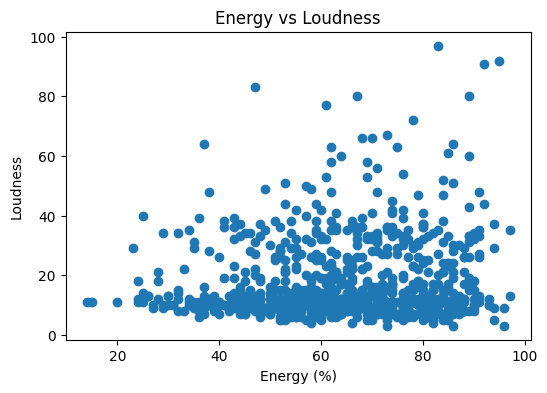

In [18]:
# scatter plot - energy vs liveness.
plt.figure(figsize=(6,4))
plt.scatter(df['energy_%'], df['liveness_%'])
plt.xlabel("Energy (%)")
plt.ylabel("Loudness")
plt.title("Energy vs Loudness")
plt.show()

#### Histogram

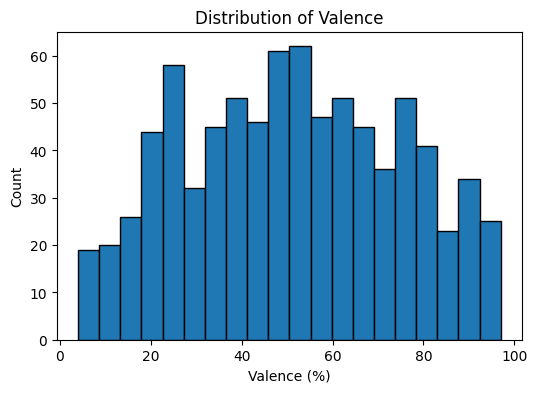

In [19]:
# histogram - distribution of song valence.
plt.figure(figsize=(6,4))
plt.hist(df['valence_%'], bins=20, edgecolor='black')
plt.xlabel("Valence (%)")
plt.ylabel("Count")
plt.title("Distribution of Valence")
plt.show()


#### Pie Chart

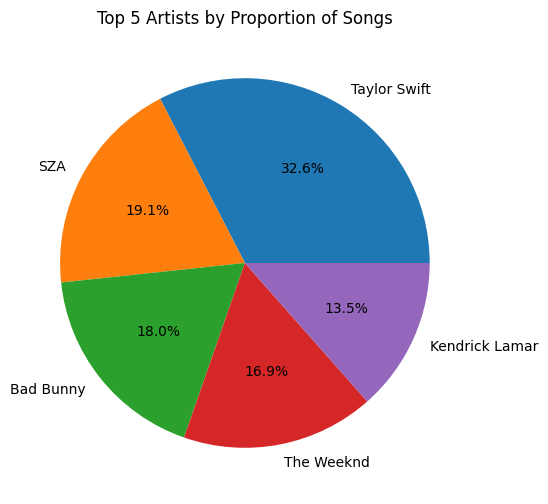

In [20]:
artist_counts = df['artist(s)_name'].value_counts().head(5)

plt.figure(figsize=(6,6))
plt.pie(artist_counts, labels=artist_counts.index, autopct='%1.1f%%')
plt.title("Top 5 Artists by Proportion of Songs")
plt.show()
